# Webscraping, 3 ejercicios

Importamos las libreías

In [3]:
import requests
from bs4 import BeautifulSoup


# Ejercicio 1: Simple

Obtenemos datos sobre la torre Eiffel y los guardamos como archivo JSON

In [4]:
url = "https://www.toureiffel.paris/es/el-monumento/cifras-clave"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36',
}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    print("Página recibida OK!")
    data = response.text
else:
    print("Error desde el servidor: " + response.status_code)


Página recibida OK!


In [5]:
# Instancia del objeto beautiful soup con el código HTML
soup = BeautifulSoup(data, 'html.parser')


In [6]:
#podemos ver todo el código de la página
soup.body

<body class="node">
<!-- Google Tag Manager (noscript) -->
<noscript><iframe height="0" src="https://www.googletagmanager.com/ns.html?id=GTM-NHNNWH9" style="display:none;visibility:hidden" width="0"></iframe></noscript>
<!-- End Google Tag Manager (noscript) -->
<a class="visually-hidden focusable" href="#main-content">
      Pasar al contenido principal
    </a>
<div class="dialog-off-canvas-main-canvas" data-off-canvas-main-canvas="">
<div class="mobile_nav_ctr">
<button class="close_menu_btn">
<span>Menu_btn</span>
</button>
</div>
<a class="mobile_ticket_link" href="https://ticketpro.toureiffel.paris" target="_blank">Entradas</a>
<div class="layout-container">
<header class="main_header" role="banner">
<div class="header_top">
<div class="max_width0 clearfix">
<div class="top_nav_ctr">
<div class="main_nav_ctr">
<div class="region region-navigation">
<nav aria-labelledby="block-menuprincipalefr-menu" class="block block-menu navigation menu--menu-principale-fr" id="block-menuprincip

In [7]:
# Podemos acceder a la tabla directamente desde el objeto soup
soup.table

<table align="left" border="2" cellpadding="2" cellspacing="2" style="width: 700px;">
<caption>
<h3>Cifras clave</h3>
</caption>
<tbody>
<tr>
<th scope="row">Altura actual</th>
<td>324 metros</td>
</tr>
<tr>
<th scope="row">Altura inicial sin antena</th>
<td>312 metros</td>
</tr>
<tr>
<th scope="row">Ancho total</th>
<td>125 metros (en el suelo)</td>
</tr>
<tr>
<th scope="row">Ancho de un pie/pilar</th>
<td>25 metros (en el suelo)</td>
</tr>
<tr>
<th scope="row">Primera planta </th>
<td>57 metros, 4415 metros cuadrados</td>
</tr>
<tr>
<th scope="row">Secunda planta</th>
<td>115 metros, 1430 metros cuadrados</td>
</tr>
<tr>
<th scope="row">La cima</th>
<td>276 metros, 250 metros cuadrados</td>
</tr>
<tr>
<th scope="row">Ascensores</th>
<td>5 ascensores hasta la secunda planta, 2 x 2 duolifts hasta la cima</td>
</tr>
<tr>
<th scope="row">Peso de la estructura metálica</th>
<td>7 300 toneladas</td>
</tr>
<tr>
<th scope="row">Peso total</th>
<td>10 100 toneladas</td>
</tr>
<tr>
<th scope="

In [8]:
#Acceder a ka primera fila

table = soup.table
fila1 = table.tbody.find_all('tr')[1]
fila1

<tr>
<th scope="row">Altura inicial sin antena</th>
<td>312 metros</td>
</tr>

In [9]:
# Acceder a los valores
print(fila1.th.text)
print(fila1.td.text)

Altura inicial sin antena
312 metros


In [10]:
# Cantidad de Filas
filas = table.tbody.find_all('tr')
len(filas)

13

Iteramos las filas y creamos un diccionario de datos

In [11]:
nuevo_dict = dict()
for fila in filas:
    clave = fila.th.text
    valor = fila.td.text
    nuevo_dict[clave] = valor
nuevo_dict

{'Altura actual': '324 metros',
 'Altura inicial sin antena': '312 metros',
 'Ancho total': '125 metros (en el suelo)',
 'Ancho de un pie/pilar': '25 metros (en el suelo)',
 'Primera planta\xa0': '57 metros, 4415 metros cuadrados',
 'Secunda planta': '115 metros, 1430 metros cuadrados',
 'La cima': '276 metros, 250 metros cuadrados',
 'Ascensores': '5 ascensores hasta la secunda planta, 2 x 2 duolifts hasta la cima',
 'Peso de la\xa0estructura metálica': '7 300 toneladas',
 'Peso total': '10 100 toneladas',
 'Número\xa0de\xa0remaches': '2 500 000',
 'Número de piezas de hierro': '18 038',
 'Pilares': '\xa0Cuatro pilares, un cuadrado de 125 metros de lado\xa0'}

In [12]:
# podemos hacer el mismo diccionario en una sóla línea con map y lambda
nuevo_dict = list(map(lambda a,b:{a.th.text:b.td.text},filas,filas))
nuevo_dict

[{'Altura actual': '324 metros'},
 {'Altura inicial sin antena': '312 metros'},
 {'Ancho total': '125 metros (en el suelo)'},
 {'Ancho de un pie/pilar': '25 metros (en el suelo)'},
 {'Primera planta\xa0': '57 metros, 4415 metros cuadrados'},
 {'Secunda planta': '115 metros, 1430 metros cuadrados'},
 {'La cima': '276 metros, 250 metros cuadrados'},
 {'Ascensores': '5 ascensores hasta la secunda planta, 2 x 2 duolifts hasta la cima'},
 {'Peso de la\xa0estructura metálica': '7 300 toneladas'},
 {'Peso total': '10 100 toneladas'},
 {'Número\xa0de\xa0remaches': '2 500 000'},
 {'Número de piezas de hierro': '18 038'},
 {'Pilares': '\xa0Cuatro pilares, un cuadrado de 125 metros de lado\xa0'}]

## Guardamos los resultados

In [13]:
import json

filename = "torre-eiffel.json"
with open(filename, 'w', encoding='utf-8') as f:
    json.dump(nuevo_dict, f, ensure_ascii=False, indent=4)


   # Ejercicio 2: Dificultad Media

Queremos extraer una tabla completa de la Wikipedia.<p>
Transformar datos y generar un nuevo Dataset.<p>
Guardamos en csv

In [14]:
# importamos Pandas
import pandas as pd

In [15]:
url = "https://es.wikipedia.org/wiki/Anexo:Monumentos_m%C3%A1s_visitados_del_mundo"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36',
}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    print("Página recibida OK!")
    data = response.text
else:
    print("Error desde el servidor: " + response.status_code)


Página recibida OK!


In [16]:
# Vemos el código
data

'<!DOCTYPE html>\n<html class="client-nojs" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Anexo:Monumentos más visitados del mundo - Wikipedia, la enciclopedia libre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"2e9df8bc-9afe-40cc-9a59-4626ece4b3fa","wgCSPNonce":false,"wgCanonicalNamespace":"Anexo","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":104,"wgPageName":"Anexo:Monumentos_más_visitados_del_mundo","wgTitle":"Monumentos más visitados del mundo","wgCurRevisionId":140660298,"wgRevisionId":140660298,"wgArticleId":9059306,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Anexos:Museos y galerías de 

In [17]:
# Creamos el objeto BeautifulSoup
soup = BeautifulSoup(data, 'html.parser')

In [18]:
# Vemos todas las tablas y sus clases css
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['sortable', 'striped', 'col1der', 'col7der', 'col8der']
['hlist', 'navbox-inner']


In [19]:
# Nos quedamos con la tabla indicada
table = soup.find('table', class_='sortable')

In [20]:
# Veamos los valores de cabecera de la Tabla
cabecera = table.tbody.find_all('tr')[1]
cabecera

<tr align="center" bgcolor="#D8D8D8">
<td>Imagen
</td>
<td>N.º
</td>
<td>PH
</td>
<td>Nombre
</td>
<td width="150px">Ciudad
</td>
<td width="150px">País
</td>
<td>Visitantes/año
</td>
<td width="90px">Año
</td>
<td>#
</td></tr>

In [21]:
cabecera = table.tbody.find_all('tr')[1]
tds = cabecera.find_all('td')
columnas = list(map(lambda a:a.text.strip(), tds))
columnas

['Imagen',
 'N.º',
 'PH',
 'Nombre',
 'Ciudad',
 'País',
 'Visitantes/año',
 'Año',
 '#']

In [22]:
# Creamos un Dataframe vacio para almacenar los datos
df = pd.DataFrame()

In [23]:
# Iteramos la tabla, transfornmamos y cargamos en el pandas

for row_num, row in enumerate(table.tbody.find_all('tr')):
    celdas = row.find_all('td')
    fila = {}
    if(row_num>1 and row_num<80 and celdas != []):
        for idx, celda in enumerate(celdas):
            if idx < len(columnas):
                if idx in [0,1,2,8]: #skip
                    pass 
                elif idx == 3: # Nombre
                    fila[columnas[idx]] = celda.a.text
                elif idx == 5: # Pais
                    enlace = celda.find_all("a")
                    try:
                        fila[columnas[idx]] = enlace[1].text
                    except:
                        fila[columnas[idx]] = celda.span.text
                elif idx == 6: #Visitantes
                    fila[columnas[idx]] = celda.text.strip().replace('\xa0','').replace('+','')
                else:
                    try:
                        fila[columnas[idx]] = celda.contents[0].text.strip()
                    except:
                        fila[columnas[idx]] = celda.text.strip()
        df = df.append(fila, ignore_index=True)

## Operamos con los datos

In [24]:
# transformamos la columna de visitas a tipo numérico
df["Visitantes/año"] = df["Visitantes/año"].astype(int)
df.head(20)

,Nombre,Ciudad,País,Visitantes/año,Año
0,Tumba del Imán Hussein,Kerbala,Irak,45000000,?
1,Sabarimala,Kerala,India,40000000,?
2,Tumba del Gran Imán Reza,Mashad,Irán,30000000,?
3,Santuario Meiji,Tokio,Japón,30000000,2012
4,Templo de Kashi Vishwanath,Benarés,India,21900000,2012
5,Templo de Tirupati Tirumala Devasthanams,Andhra Pradesh,India,18250000,2012
6,Ciudad Prohibida,Pekín,China,17000000,2018
7,Catedral de Notre Dame,París,Francia,13000000,?
8,Basílica de San Pedro,Ciudad del Vaticano,Ciudad del Vaticano,11000000,2018
9,Basílica de Nuestra Señora Aparecida,Aparecida,Brasil,13000000,2017


In [25]:
# Filtramos solo los monumentos de Francia
francia = df[df['País']=='Francia']
francia = francia[["Nombre","Visitantes/año"]]
francia = francia.set_index("Nombre")
francia

,Visitantes/año
Nombre,
Catedral de Notre Dame,13000000
Basílica del Sagrado Corazón,10500000
Palacio de Versalles,8100000
Torre Eiffel,7000000
Santuario de Nuestra Señora de Lourdes,6000000
Museo de Orsay,3651616


## Visualización de Datos

<IPython.core.display.Javascript object>


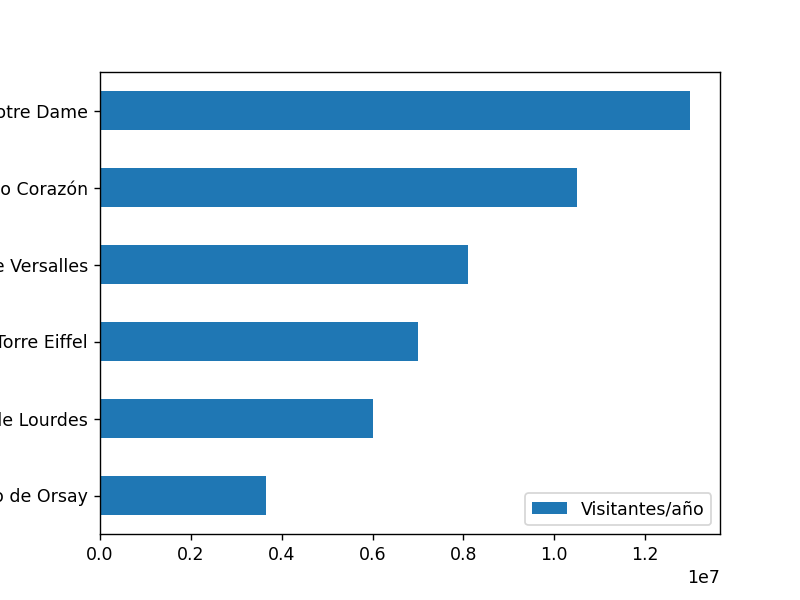

<AxesSubplot:ylabel='Nombre'>

In [26]:
from matplotlib import pyplot as plt
%matplotlib notebook

francia.sort_values("Visitantes/año").plot(kind="barh")

Vemos que la Torre Eiffel es rl 4to monumento de Francia con más visitas anuales

## Guardamos los datos en CSV

In [27]:
df.to_csv("monumentos.csv")

# Ejercicio 3: Avanzado

Para este ejercicio utilizaremos Selenium.<p>
    Asegurate tener instalado el driver de <a href="https://chromedriver.chromium.org">Google Chrome</a> (también puede ser Fireforx, Safari o Edge)<p>
También de instalar el paquete con 'pip install selenium'<p>
Debes indicar la ruta del ejecutable de selenium (en Windows será chromedriver.exe)

In [28]:
CHROMIUM_PATH='C:\\Users\\drivers\\chromedriver_win32\\chromedriver.exe'

Definimos una función de espera, para simular la espera, como un humano

In [29]:
def wait_until(driver, secs):
    try:
        wait = WebDriverWait(driver, secs)
        wait.until(expected_conditions.element_to_be_clickable((By.XPATH, "//button[@id='btn1']")))
    except:
        pass

In [30]:
# Importamos las clases de Selenium
from selenium import webdriver
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait

In [31]:
options = webdriver.ChromeOptions()
options.add_argument(
    '--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36')
options.add_argument('--ignore-certificate-errors')
options.add_argument('--ignore-ssl-errors')

driver = webdriver.Chrome(executable_path=CHROMIUM_PATH, chrome_options=options)

web = "https://www.instagram.com/"

driver.get(web)

C:\Users\jibagnato\Anaconda3\envs\genspaclassifier\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


## Aceptamos la Cookie

In [32]:
cookie_button = driver.find_element_by_xpath(f"//button[text()='Aceptar todas']")
cookie_button.click()

## Completamos el formulario de Login

In [33]:
# get element
element = driver.find_element_by_name("username")
# send keys
element.send_keys("TU_USUARIO")

wait_until(driver, 1)

element = driver.find_element_by_name("password")

element.send_keys("TU_PASSWORD")

In [34]:
driver.find_element_by_id("loginForm").submit()

## Ya estamos Logueados

In [35]:
# Vamos a la página de Torre Eiffel
driver.get("https://www.instagram.com/explore/locations/307177342743013/torre-eiffel/")

In [36]:
# Filtramos los elementos de IMAGEN
elements = driver.find_elements_by_xpath('//img')
elements

[<selenium.webdriver.remote.webelement.WebElement (session="393c8c3df2c86e69c89a20b5cdda1678", element="8df7a14e-4f18-4e91-8034-bd17ff34cc36")>,
 <selenium.webdriver.remote.webelement.WebElement (session="393c8c3df2c86e69c89a20b5cdda1678", element="0a0fcd94-ca62-4421-be47-692571efc928")>,
 <selenium.webdriver.remote.webelement.WebElement (session="393c8c3df2c86e69c89a20b5cdda1678", element="cba810e3-cd31-4c31-a5c2-08b997a837b3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="393c8c3df2c86e69c89a20b5cdda1678", element="22c8be14-c053-4955-90f1-974f1279e51a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="393c8c3df2c86e69c89a20b5cdda1678", element="47599c14-e443-4c19-8ae4-184c22a64723")>,
 <selenium.webdriver.remote.webelement.WebElement (session="393c8c3df2c86e69c89a20b5cdda1678", element="334b1175-471d-4d6b-92ca-dac48053f241")>,
 <selenium.webdriver.remote.webelement.WebElement (session="393c8c3df2c86e69c89a20b5cdda1678", element="351c7f18-5c41-424a-9d14-3c

In [37]:
len(elements)

60

## Guardamos las imagenes

Iteramos las imagenes, capturamos, hacemos scroll

In [38]:
directory="./screenshots" # el directorio de destino DEBE existir

px_scroll = 60

elements = driver.find_elements_by_xpath('//img')
for idx, element in enumerate(elements):
    with open(f"{directory}/capture-{idx}.png", 'wb') as file:
        try:
            file.write(element.screenshot_as_png)
        except:
            pass
    wait_until(driver, 1)

    driver.execute_script(f"window.scrollTo(0,{300+(idx*px_scroll)})")
    wait_until(driver, 1)

    if idx > 60:
        break


Finalizamos la sesion del navegador

In [39]:
driver.quit()